# Week4授業前課題1 アヤメの分類 

## このテキストについて

### このテキストの目的
・教師あり学習（分類）の概観を知る  
・scikit-laernを使い分類を行えるようにする  
・手法の簡単な比較をする

### どのように学ぶか
定番のデータセットを通じて、分類問題を解く流れやライブラリの使い方を学びます。

## アヤメの分類

Week3で使用したirisデータセットを使い、分類問題を解く練習をします。

irisデータセットはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータでした。

・Iris setosa - Wikipedia : https://en.wikipedia.org/wiki/Iris_setosa  
・Iris virgicolor - Wikipedia : https://en.wikipedia.org/wiki/Iris_versicolor  
・Iris virginica - Wikipedia : https://en.wikipedia.org/wiki/Iris_virginica  

4種類の特徴量（説明変数）からアヤメの種類を推測する問題が設定できます。アヤメの種類を 分類 するので、こういったものを分類問題と呼びます。

### 今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。  
それぞれの手法についての詳細は今の段階では扱いません。  
ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。

・最近傍法  
・ロジスティック回帰  
・SVM  
・決定木  
・ランダムフォレスト  

## 分類問題の流れ

まず、最近傍法を例に分類問題を解く基本的な流れを紹介します。  
課題の後半ではこれを参考に他の手法にも適用してもらいます。

この流れについては後々より深く学び、実践していきます。  
今回の課題では大まかな流れの把握を行ってください。

### 練習のための準備
練習する上で結果の可視化を行いたいため、特徴量は4つの中で2つだけを使うことにします。  
こうすることで2次元の散布図を描き確認することができます。  
また、問題を単純化するためアヤメの種類を2つだけ使うことにします。  
分類対象が2種類の場合を2値分類と呼び、それ以上の多値分類とは区別をします。  
それぞれで手法や評価方法が変わります。今回はまずより基本的な2値分類を行います。

### 【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。  
irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。
  
・virgicolorとvirginica  
・sepal_lengthとpetal_length  
  
《実際の問題では？》

実際の問題を解く上でも結果の可視化は有効です。  
しかし、そのために学習や推定に使う特徴量を2つに絞るのは望ましくありません。  
そのため学習や推定は多次元で行い、可視化をする際にだけ主成分分析などの特徴抽出手法を適用するといったことが行われます。  
また、Week3で利用した散布図行列を使い可視化することも可能です。

In [2]:
#  ライブラリーをインポート
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#  アイリスデータセットの読み込み
x = pd.DataFrame(load_iris().data,
                 columns=['sepal_length', 'sepal_width', 'petal_length','petal_width'])

y = pd.DataFrame(load_iris().target,
                 columns=['Species'])

df = pd.concat([x,y],axis=1)
print(df)

     sepal_length  sepal_width  petal_length  petal_width  Species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


In [4]:
#  アイリスデータセットから、virgicolorとvirginica、sepal_lengthとpetal_lengthを抜き出す
df_extraction = df[['sepal_length','petal_length','Species']]
df_extraction = df_extraction.loc[df_extraction['Species'] != 0]
display(df_extraction)

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


### 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。  
その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。  
sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。
  
ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。  
  
《実際の問題では？》  
  
このデータ分析の結果を元に前処理として特徴量エンジニアリングを行っていきます。  
  
今回はsepal_lengthとpetal_lengthを抜き出しましたが、分析した上で、問題を少々難しくするための前処理をしたと言えます。  

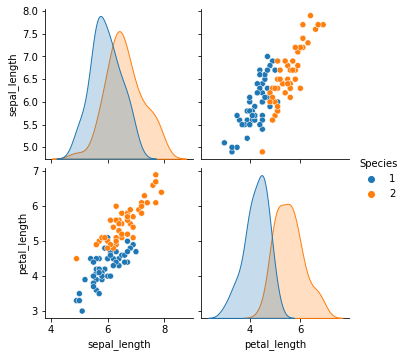

In [5]:
# 散布図行列
sns.pairplot(df_extraction,hue='Species',palette='tab10')
plt.show()

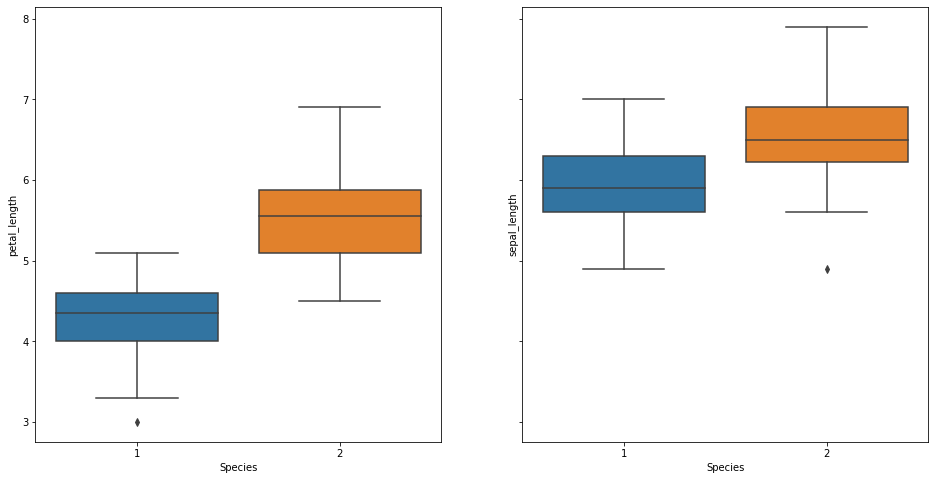

In [6]:
# 箱ひげ図
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(16,8))
sns.boxplot(x='Species',y='petal_length',data=df_extraction,ax=ax1)
sns.boxplot(x='Species',y='sepal_length',data=df_extraction,ax=ax2);

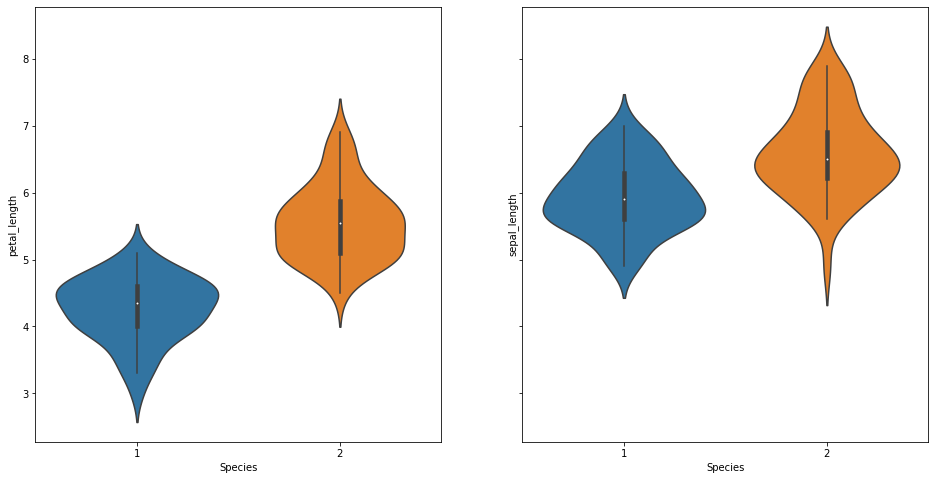

In [7]:
# バイオリン図
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(16,8))
sns.violinplot(x='Species',y='petal_length',data=df_extraction,ax=ax1)
sns.violinplot(x='Species',y='sepal_length',data=df_extraction,ax=ax2);

### 前処理
データに加工をしていきます。

### 【問題3】前処理・訓練データと検証データの分割
前処理の一貫として、訓練データと検証データの分割を行います。  
今回は訓練データ75%、検証データ25%として分割してください。  
  
scikit-learnのtrain_test_splitが利用できます。  
公式ドキュメントのExamplesを参考に動かしてください。  

sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html  
  
《注意点》  
  
データの分析まではPandasのDataFrameを使用してきました。  
しかし、scikit-learnはNumPyのndarrayを想定して作られています。  
そのため、この段階でndarrayへの変換を行いましょう。  
特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。  

《分割する理由》  
  
分類問題の目的は未知のデータを正しく分類することです。  
その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておきます。  
この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。  
学習に使うデータを訓練データ、検証に使うデータが検証データで、一般的に7対3から8対2程度の割合にします。

In [8]:
# 抽出すたデータフレームをndarrayに変換
X = df_extraction[['sepal_length','petal_length']].values
y = df_extraction['Species'].values

In [9]:
# 訓練データと、検証データに分割（75:25）
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [10]:
print('データの分割結果の確認:')
print(' X_train:',X_train.shape)
print(' y_train:',y_train.shape)
print(' X_test :',X_test.shape)
print(' y_test :',y_test.shape)

データの分割結果の確認:
 X_train: (75, 2)
 y_train: (75,)
 X_test : (25, 2)
 y_test : (25,)


### 【問題4】前処理・標準化
分類精度をあげるための加工を行います。  
手法ごとに適切な方法は異なりますが、ここでは一例として標準化を行うことにします。
  
標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。  
sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation  
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  
  
《注意点》  
  
標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。  
<span class="girk">検証データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。</span>  
また、今回は分類問題なので、ラベルについては標準化させる必要はありません。  
  
《実際の問題での前処理は？》  
  
アヤメのデータセットのように綺麗で扱いやすい状況で提供されることはまずありません。  
分析を行いながら、様々な加工が必要になってきます。  
例えばWeek3の課題2で行った欠損値の確認の後、場合により欠損値の補間も行います。  
外れ値の確認や、複数のデータセットの整理などもあります。

In [11]:
# 標準化を行う
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

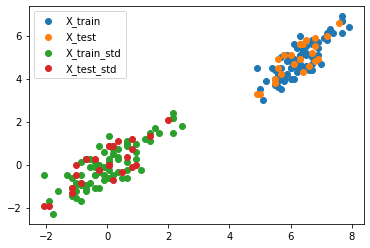

In [12]:
# 標準化前後のデータをプロットしてみる
plt.scatter(X_train[:,0],X_train[:,1],label='X_train')
plt.scatter(X_test[:,0],X_test[:,1],label='X_test')
plt.scatter(X_train_std[:,0],X_train_std[:,1],label='X_train_std')
plt.scatter(X_test_std[:,0],X_test_std[:,1],label='X_test_std')
#plt.scatter(aaa[:,0],aaa[:,1],label='aaa')
#plt.scatter(bbb[:,0],bbb[:,1],label='bbb')

plt.legend()
plt.show()

#### 標準化とは・・・
z-score normalization(z-score)と呼ばれる。  
元データを平均0,標準偏差1のデータに変換する正規化の方法のこと。

In [13]:
# 標準化ついて、numpyを使って計算過程を確認してみる。
print('平均 : ',scaler.mean_)
print('標準偏差 : ',np.sqrt(scaler.var_))

mean = X_train[:,1].mean()
std  = np.std(X_train[:,1])
print('平均 : ',mean)
print('標準偏差 : ',std)

平均 :  [6.27466667 4.9       ]
標準偏差 :  [0.66354469 0.82688169]
平均 :  4.9
標準偏差 :  0.8268816924647282


### 【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。  
scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。  
ここで入力するのは訓練データです。
  
sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation  
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier  
  
学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。  
  
パラメータが複数ありますが、今はそれらの理解を重視しません。  
最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。  
デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# 最近傍法(5-nn)で学習を行う
model_n5 = KNeighborsClassifier()
model_n5.fit(X_train_std, y_train)
y_pred_n5 = model_n5.predict(X_test_std)
print(y_pred_n5)

[1 2 1 2 2 2 1 2 2 2 2 2 2 2 1 1 2 1 2 1 1 2 1 2 1]


In [15]:
# 最近傍法(3-nn)で学習を行う
model_n3 = KNeighborsClassifier(n_neighbors=3)
model_n3.fit(X_train_std, y_train)
y_pred_n3 = model_n3.predict(X_test_std)
print(y_pred_n3)

[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]


In [16]:
# 最近傍法(1-nn)で学習を行う
model_n1 = KNeighborsClassifier(n_neighbors=1)
model_n1.fit(X_train_std, y_train)
y_pred_n1 = model_n1.predict(X_test_std)
print(y_pred_n1)

[1 2 2 2 2 2 1 2 2 1 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]


### 【問題6】評価
検証データの特徴量を入力して得られた推定値と、  
検証データの正解値の近さを計算し、学習したモデルを評価します。
  
2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。
  
・scikit-learnを使い4種類の指標を計算する  
・混同行列をscikit-learnを使い表示する  
・4種類の指標値の意味について簡単に調査して文章でまとめる  
  
Accuracy（正解率）:  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
  
Precision（適合率）:  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score  
  
Recall（再現率）:  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score  
  
F値 :  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score  
  
混同行列（confusion matrix）:  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

In [17]:
# 正解率
from sklearn.metrics import accuracy_score
print('Accuracy(5-nn): ',accuracy_score(y_test, y_pred_n5))
print('Accuracy(3-nn): ',accuracy_score(y_test, y_pred_n3))
print('Accuracy(1-nn): ',accuracy_score(y_test, y_pred_n1))

Accuracy(5-nn):  0.88
Accuracy(3-nn):  0.92
Accuracy(1-nn):  0.84


In [18]:
# 適合率
from sklearn.metrics import precision_score
print('Precision(5-nn): ',precision_score(y_test, y_pred_n5))
print('Precision(3-nn): ',precision_score(y_test, y_pred_n3))
print('Precision(1-nn): ',precision_score(y_test, y_pred_n1))

Precision(5-nn):  1.0
Precision(3-nn):  1.0
Precision(1-nn):  0.9090909090909091


In [19]:
# 再現率
from sklearn.metrics import recall_score
print('Recall(5-nn): ',recall_score(y_test, y_pred_n5))
print('Recall(3-nn): ',recall_score(y_test, y_pred_n3))
print('Recall(1-nn): ',recall_score(y_test, y_pred_n1))

Recall(5-nn):  0.7692307692307693
Recall(3-nn):  0.8461538461538461
Recall(1-nn):  0.7692307692307693


In [20]:
# F値
from sklearn.metrics import f1_score
print('F1(5-nn): ',f1_score(y_test, y_pred_n5))
print('F1(3-nn): ',f1_score(y_test, y_pred_n3))
print('F1(1-nn): ',f1_score(y_test, y_pred_n1))

F1(5-nn):  0.8695652173913044
F1(3-nn):  0.9166666666666666
F1(1-nn):  0.8333333333333333


In [21]:
# 混同行列
from sklearn.metrics import confusion_matrix

print('Confusion(5-nn): \n',confusion_matrix(y_test, y_pred_n5))
print('Confusion(3-nn): \n',confusion_matrix(y_test, y_pred_n3))
print('Confusion(1-nn): \n',confusion_matrix(y_test, y_pred_n1))

Confusion(5-nn): 
 [[10  3]
 [ 0 12]]
Confusion(3-nn): 
 [[11  2]
 [ 0 12]]
Confusion(1-nn): 
 [[10  3]
 [ 1 11]]


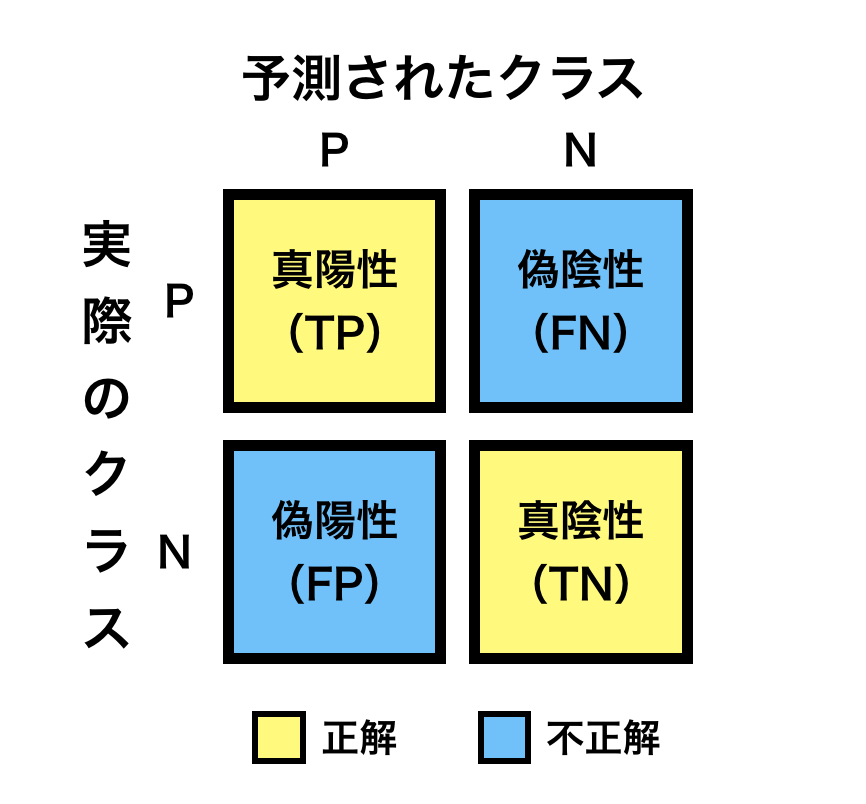

In [22]:
from IPython.display import Image
file_name = "https://aidemyexcontentspic.blob.core.windows.net/contents-pic/2010_ml_introduction/img_3_10.png"
Image(file_name)

＜＜分類における評価指標の定義＞＞  
・混同行列（Confusion_matrix）  
  分類における予測結果と、真の値との組み合わせは、上図のように分けられる。  
  真陽性（TP）・・・真の値が正事例に対して、正事例と予測した  
  真陰性（TN）・・・真の値が負事例に対して、負事例と予測した  
  偽陽性（FP）・・・真の値が負事例に対して、正事例と予測した  
  偽陰性（FN）・・・真の値が正事例に対して、負事例と予測した  
  
・正解率（Acurracy）  
  予測結果全体がどれくらい真の値と一致しているか？を表す指標。  
  $$Accuracy = \displaystyle\frac{TP+TN}{TP+FP+FN+TN}$$  　
  
  注意すべき点として、正事例と負事例が不均衡なデータに対して、正解率が高くても少ない事例に適合しているか判断できない（例えば、正事例が8個、負事例が2個のとき、負事例の予測が全滅でも正解率80%となることがある）
  
・適合率（Precison）  
  正事例と予測した中で、真の値が正事例の割合を表す指標。
  $$Precision = \displaystyle\frac{TP}{TP+FP}$$   
    
・再現率（Recall）  
　真の値が正事例の中で、正事例と予測した割合を表す指標。
  $$Recall = \displaystyle\frac{TP}{TP + FN}$$  
  
・F値（F-measure）  
　適合率と再現率はトレードオフの関係にあるので、2つの指標をまとめた指標。
  $$F – measure = \displaystyle\frac{2Precision * Recall}{Precision + Recall}$$  

### 【問題7】可視化
評価の一貫として可視化を行います。  
今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。  
以下にどう分割するかという 決定領域 を描く関数を用意しました。  
これを利用して可視化を行ってください。Xとyには訓練データまたは検証データを与えます。

In [23]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X,y,model,step=0.01,
                    title='decision region', xlabel='xlabel', ylabel='ylabel',
                    target_names=['versicolor', 'virginica']
                   ):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

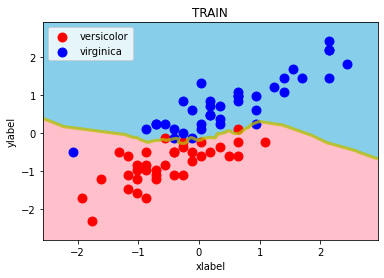

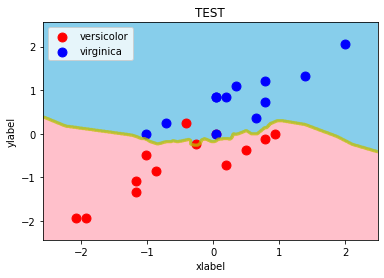

In [24]:
# 5-nnの決定領域を表示
decision_region(X_train_std,y_train,model_n5,title='TRAIN')
decision_region(X_test_std,y_test,model_n5,title='TEST')

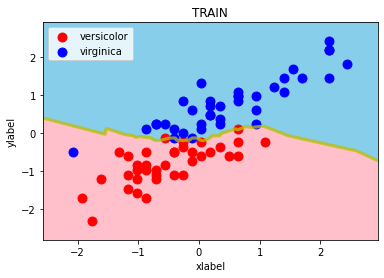

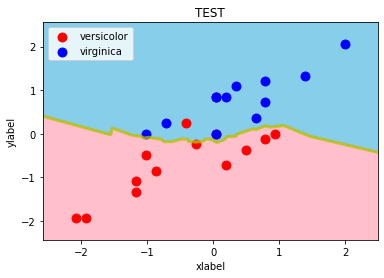

In [25]:
# 3-nnの決定領域を表示
decision_region(X_train_std,y_train,model_n3,title='TRAIN')
decision_region(X_test_std,y_test,model_n3,title='TEST')

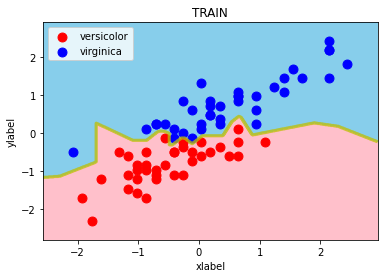

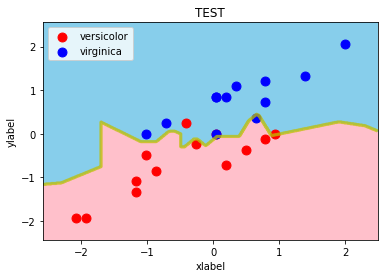

In [26]:
# 1-nnの決定領域を表示
decision_region(X_train_std,y_train,model_n1,title='TRAIN')
decision_region(X_test_std,y_test,model_n1,title='TEST')

### 手法の改善
実際の問題では指標値や可視化を元に手法を改善していきますが、この課題では扱いません。

## 各手法の比較
他の手法も基本的な流れは同様です。他の手法でも学習から可視化までを行っていきます。

### 【問題8】他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。  
そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。  どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。  
  
・最近傍法  
・ロジスティック回帰  
・SVM  
・決定木  
・ランダムフォレスト  
  
公式ドキュメントへのリンクは以下です。  
それぞれ調整すべき引数（ハイパーパラメータ）がありますが、この課題では扱いません。  
まずはデフォルトの値で実行してください。

・sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation  
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier  

・sklearn.linear_model.LogisticRegression — scikit-learn 0.21.3 documentation  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html  

・sklearn.svm.SVC — scikit-learn 0.21.3 documentation  
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC  

・sklearn.tree.DecisionTreeClassifier — scikit-learn 0.21.3 documentation  
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier  

・sklearn.ensemble.RandomForestClassifier — scikit-learn 0.21.3 documentation  
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier  

《実際の問題では？》  

ハイパーパラメータの調整は パラメータチューニングと呼ばれる工程で、  
その手法としてグリッドサーチなどが存在します。

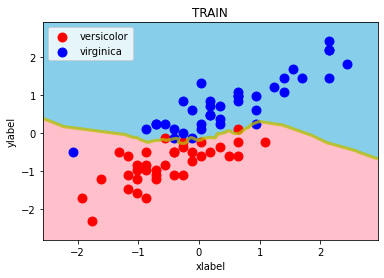

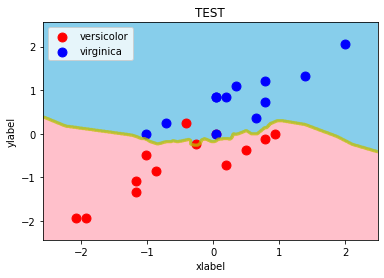

In [27]:
# 最近傍法
clf = KNeighborsClassifier()

clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

result = pd.DataFrame([[accuracy,precision,recall,f1]],
                   index=['Kneighbors'],
                   columns=['Accuracy','Precision','Recall','F1_measure'])

decision_region(X_train_std,y_train,clf,title='TRAIN')
decision_region(X_test_std,y_test,clf,title='TEST')

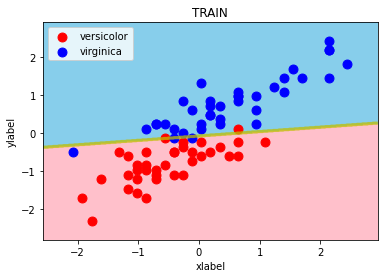

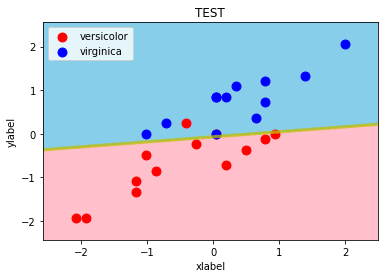

In [28]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)

clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

tmp = pd.DataFrame([[accuracy,precision,recall,f1]],
                   index=['Logistic'],
                   columns=['Accuracy','Precision','Recall','F1_measure'])

result = pd.concat([result,tmp],axis=0)

decision_region(X_train_std,y_train,clf,title='TRAIN')
decision_region(X_test_std,y_test,clf,title='TEST')

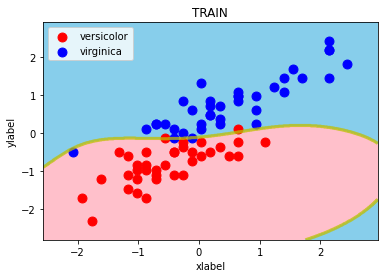

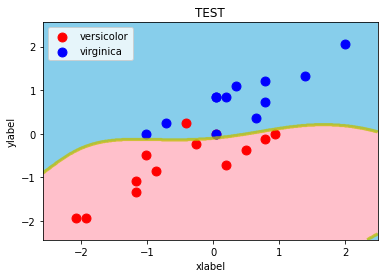

In [29]:
# SVM
from sklearn.svm import SVC

clf = SVC(gamma='auto')

clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

tmp = pd.DataFrame([[accuracy,precision,recall,f1]],
                   index=['SVM'],
                   columns=['Accuracy','Precision','Recall','F1_measure'])

result = pd.concat([result,tmp],axis=0)

decision_region(X_train_std,y_train,clf,title='TRAIN')
decision_region(X_test_std,y_test,clf,title='TEST')

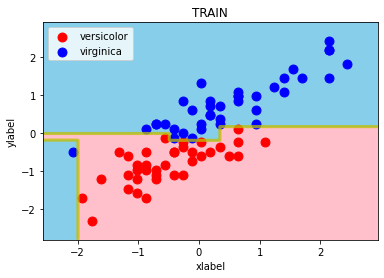

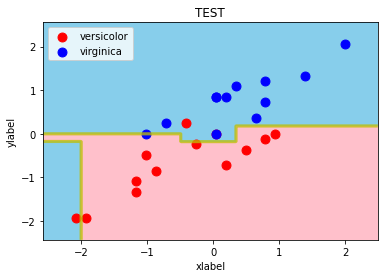

In [30]:
# 決定木
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

tmp = pd.DataFrame([[accuracy,precision,recall,f1]],
                   index=['DecisionTree'],
                   columns=['Accuracy','Precision','Recall','F1_measure'])

result = pd.concat([result,tmp],axis=0)

decision_region(X_train_std,y_train,clf,title='TRAIN')
decision_region(X_test_std,y_test,clf,title='TEST')

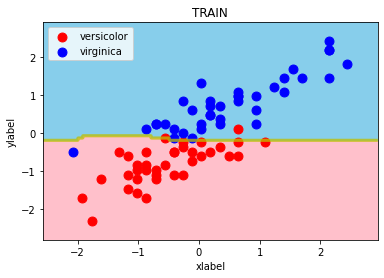

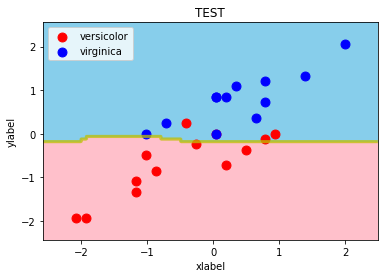

In [31]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

tmp = pd.DataFrame([[accuracy,precision,recall,f1]],
                   index=['RandomForest'],
                   columns=['Accuracy','Precision','Recall','F1_measure'])

result = pd.concat([result,tmp],axis=0)

decision_region(X_train_std,y_train,clf,title='TRAIN')
decision_region(X_test_std,y_test,clf,title='TEST')

In [32]:
# 各手法の評価指標を示す
result

,Accuracy,Precision,Recall,F1_measure
Kneighbors,0.88,1.0,0.769231,0.869565
Logistic,0.92,1.0,0.846154,0.916667
SVM,0.92,1.0,0.846154,0.916667
DecisionTree,0.88,1.0,0.769231,0.869565
RandomForest,0.84,1.0,0.692308,0.818182


### 【問題8】各手法の結果＜考察＞
今回は、ロジスティック回帰とSVMが他に比べて正解率、再現率で上回る評価となった。  
決定木、ランダムフォレストは、他と比べて再現率の指標が悪く8割を下回った。  
決定領域は、決定木が縦、横の線形な線の組み合わせがエリア分けしているのに対して、  
その他の手法は、一本の非線形な線（ロジスティック回帰は線形）でエリアを区切っている。

### 【問題9】（アドバンス課題）標準化の有無の比較
前処理として標準化を行いましたが、これを行わなかった場合どのような結果が得られるでしょうか。  
各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行ってください。  
考察には標準化が機械学習の前処理としてどのような意味があるかを絡めてください。

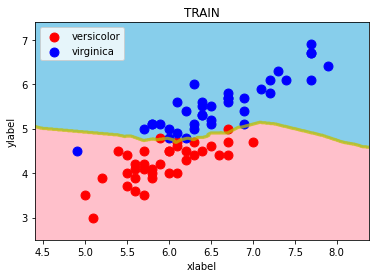

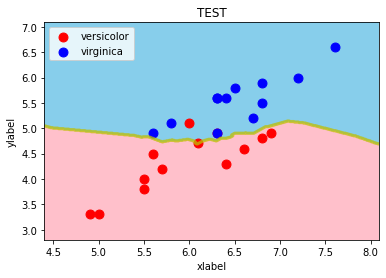

In [33]:
# 最近傍法（標準化無し）
clf = KNeighborsClassifier()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

tmp = pd.DataFrame([[accuracy,precision,recall,f1]],
                   index=['Kneighbors_not_std'],
                   columns=['Accuracy','Precision','Recall','F1_measure'])

result = pd.concat([result,tmp],axis=0)

decision_region(X_train,y_train,clf,title='TRAIN')
decision_region(X_test,y_test,clf,title='TEST')

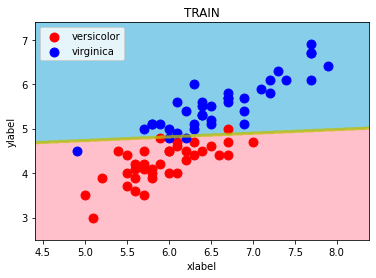

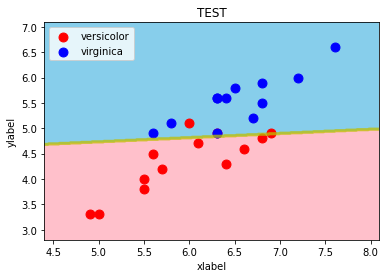

In [34]:
# ロジスティック回帰（標準化無し）
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

tmp = pd.DataFrame([[accuracy,precision,recall,f1]],
                   index=['Logistic_not_std'],
                   columns=['Accuracy','Precision','Recall','F1_measure'])

result = pd.concat([result,tmp],axis=0)

decision_region(X_train,y_train,clf,title='TRAIN')
decision_region(X_test,y_test,clf,title='TEST')

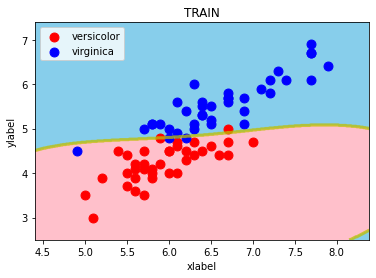

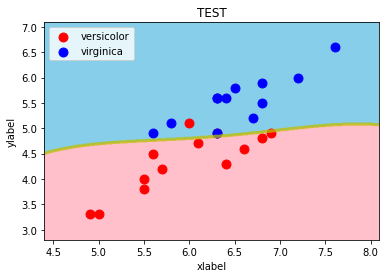

In [35]:
# SVM（標準化無し）
from sklearn.svm import SVC

clf = SVC(gamma='auto')

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

tmp = pd.DataFrame([[accuracy,precision,recall,f1]],
                   index=['SVM_not_std'],
                   columns=['Accuracy','Precision','Recall','F1_measure'])

result = pd.concat([result,tmp],axis=0)

decision_region(X_train,y_train,clf,title='TRAIN')
decision_region(X_test,y_test,clf,title='TEST')

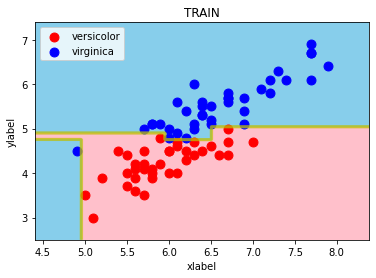

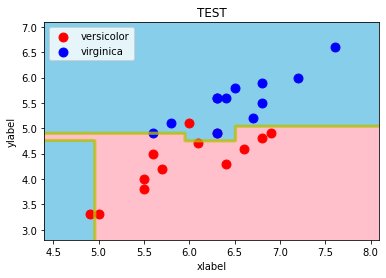

In [36]:
# 決定木（標準化無し）
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

tmp = pd.DataFrame([[accuracy,precision,recall,f1]],
                   index=['DecisionTree_not_std'],
                   columns=['Accuracy','Precision','Recall','F1_measure'])

result = pd.concat([result,tmp],axis=0)

decision_region(X_train,y_train,clf,title='TRAIN')
decision_region(X_test,y_test,clf,title='TEST')

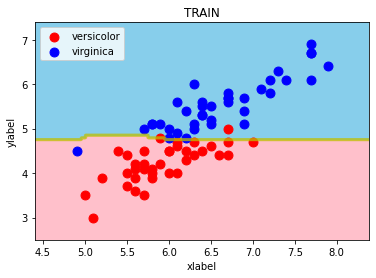

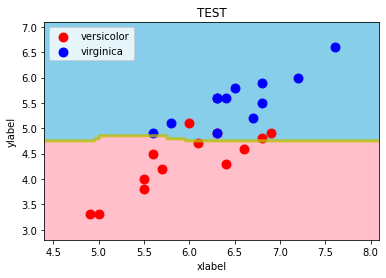

In [37]:
# ランダムフォレスト(標準化無し）
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

tmp = pd.DataFrame([[accuracy,precision,recall,f1]],
                   index=['RandomForest_not_std'],
                   columns=['Accuracy','Precision','Recall','F1_measure'])

result = pd.concat([result,tmp],axis=0)

decision_region(X_train,y_train,clf,title='TRAIN')
decision_region(X_test,y_test,clf,title='TEST')

In [38]:
# 標準化の有無で結果を比較する
result.sort_index()

,Accuracy,Precision,Recall,F1_measure
DecisionTree,0.88,1.000000,0.769231,0.869565
DecisionTree_not_std,0.84,0.909091,0.769231,0.833333
Kneighbors,0.88,1.000000,0.769231,0.869565
Kneighbors_not_std,0.92,1.000000,0.846154,0.916667
Logistic,0.92,1.000000,0.846154,0.916667
Logistic_not_std,0.88,1.000000,0.769231,0.869565
RandomForest,0.84,1.000000,0.692308,0.818182
RandomForest_not_std,0.84,1.000000,0.692308,0.818182
SVM,0.92,1.000000,0.846154,0.916667
SVM_not_std,0.92,1.000000,0.846154,0.916667


### 【問題9】標準化の有無の比較＜考察＞
SVM、ランダムフォレスには指標の違いが確認出来なかった。  
ロジスティック回帰、決定木は、標準化無しの方が、正解率、適合率、F値が悪くなった。  
最近傍法は、標準化無しの方が正解率、再現率、F値が改善している。 
  
今回の結果は、標準化の有無で結果に目立つ違いは出なかった。  
その理由として、特徴量のデータスケールに大きな違いが無かったためと考える。  
仮に、2つの特徴量のデータスケールが異なれば、標準化後のデータが精度が高くなると予想されるので、  
データの前処理は、丁寧に行いたい。

### 【問題10】（アドバンス課題）全ての目的変数を使用して精度が高い手法
ここまではアヤメの種類を減らし2値分類を行ってきましたが、3種類全てを使った多値分類を行います。  
学習と推定、評価を行って、最も精度の高い手法を探してください。  
  
《多値になることでの変更点》  
  
指標値Precision（適合率）、Recall（再現率）、F値はライブラリのパラメータをデフォルトから変更する必要があります。マイクロ平均やマクロ平均という考え方を使います。  
  
決定領域を可視化する前述の関数は適切に書き換える必要があります。  
  
ロジスティック回帰やSVMは2値分類を基本とした手法で、多値分類には工夫が必要ですが、scikit-learnでは自動的に判断して処理が行われるため変更は必要ありません。

In [39]:
#再度、アイリスデータセットの確認
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [40]:
d1 = 'sepal_length'
d2 = 'petal_length'

X = df[[d1,d2]].values
y = df['Species'].values

In [41]:
# 訓練データ、検証データの作成（75:25）
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

print('データの分割結果の確認:')
print(' X_train:',X_train.shape)
print(' y_train:',y_train.shape)
print(' X_test :',X_test.shape)
print(' y_test :',y_test.shape)

データの分割結果の確認:
 X_train: (112, 2)
 y_train: (112,)
 X_test : (38, 2)
 y_test : (38,)


In [42]:
# 標準化
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

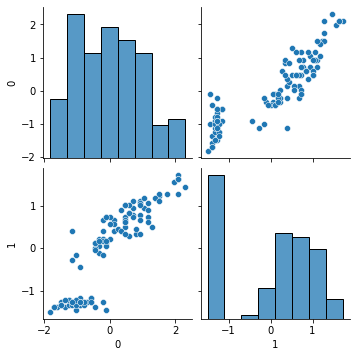

In [43]:
#標準化後のデータを確認
sns.pairplot(pd.DataFrame(X_train_std))
plt.show()

In [44]:
def decision_region(X_train_std,
                    y_train,
                    model,
                    step=0.01,
                    title='decision region',
                    xlabel='xlabel',
                    ylabel='ylabel',
                    target_names=['setosa','versicolor', 'virginica']
                   ):
    """
    多値分類を2つの特徴量から学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データ。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルを与える
    xlabel, ylabel : str
        軸ラベルのタイトルを与える
    target_names= : list of str
        凡例の一覧を与える
    """
    
    # setting
    scatter_color = ['red', 'blue','green']
    contourf_color = ['pink', 'skyblue','orange']
    n_class = len(np.unique(y_train))
    
    X = X_train_std
    y = y_train
    
    # pred
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])-0.5,np.max(X[:,0])+0.5,step),
                                   np.arange(np.min(X[:,1])-0.5,np.max(X[:,1])+0.5,step))
    
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0,mesh_f1,y_pred,n_class-1,cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0,mesh_f1,y_pred,n_class-1,colors='y',linewidths=3, alpha=0.5)
    
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0],
                    X[y==target][:, 1],
                    s=80,
                    color=scatter_color[i],
                    label=target_names[i],
                    marker='o')
        
    patches = [mpatches.Patch(color=scatter_color[i],label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

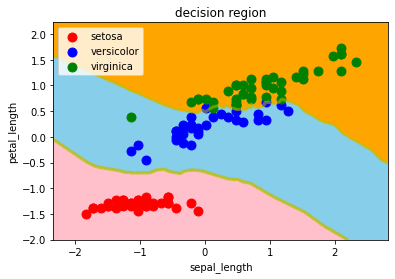

In [45]:
# 最近傍法
clf = KNeighborsClassifier()

clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test, y_pred,average='micro')

result = pd.DataFrame([[accuracy,precision,recall,f1]],
                   index=['Kneighbors'],
                   columns=['Accuracy','Precision','Recall','F1_measure'])

decision_region(X_train_std,y_train,clf,ylabel=d2,xlabel=d1)

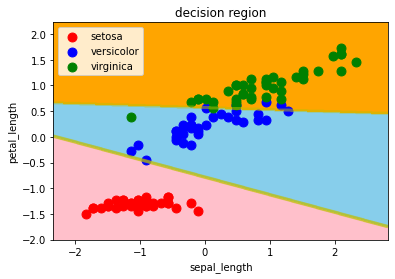

In [46]:
# ロジスティック回帰
clf = LogisticRegression(random_state=0)

clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test, y_pred,average='micro')

tmp = pd.DataFrame([[accuracy,precision,recall,f1]],
                   index=['Logistic'],
                   columns=['Accuracy','Precision','Recall','F1_measure'])

result = pd.concat([result,tmp],axis=0)

decision_region(X_train_std,y_train,clf,ylabel=d2,xlabel=d1)

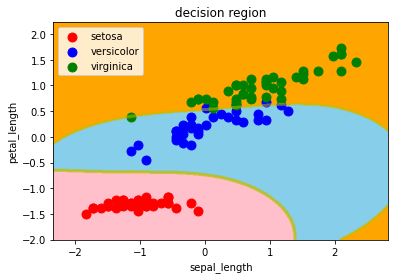

In [47]:
# SVM
clf = SVC(gamma='auto')

clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test, y_pred,average='micro')

tmp = pd.DataFrame([[accuracy,precision,recall,f1]],
                   index=['SVM'],
                   columns=['Accuracy','Precision','Recall','F1_measure'])

result = pd.concat([result,tmp],axis=0)

decision_region(X_train_std,y_train,clf,ylabel=d2,xlabel=d1)

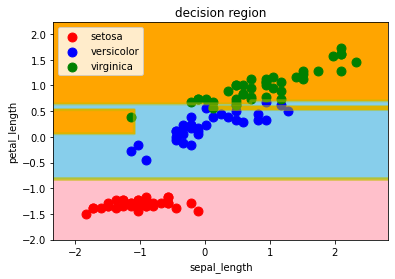

In [48]:
# 決定木
clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test, y_pred,average='micro')

tmp = pd.DataFrame([[accuracy,precision,recall,f1]],
                   index=['DecisionTree'],
                   columns=['Accuracy','Precision','Recall','F1_measure'])

result = pd.concat([result,tmp],axis=0)

decision_region(X_train_std,y_train,clf,ylabel=d2,xlabel=d1)

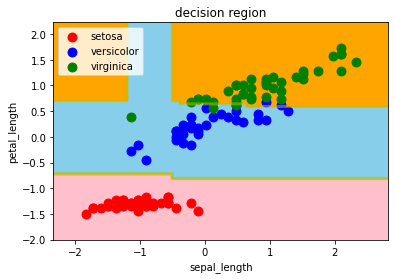

In [49]:
# ランダムフォレスト
clf = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test, y_pred,average='micro')

tmp = pd.DataFrame([[accuracy,precision,recall,f1]],
                   index=['RandomForest'],
                   columns=['Accuracy','Precision','Recall','F1_measure'])

result = pd.concat([result,tmp],axis=0)

decision_region(X_train_std,y_train,clf,ylabel=d2,xlabel=d1)

In [50]:
# 3値分類（特徴量 petal_length,sepal_length）
result

,Accuracy,Precision,Recall,F1_measure
Kneighbors,0.947368,0.947368,0.947368,0.947368
Logistic,0.947368,0.947368,0.947368,0.947368
SVM,0.947368,0.947368,0.947368,0.947368
DecisionTree,0.894737,0.894737,0.894737,0.894737
RandomForest,0.894737,0.894737,0.894737,0.894737


＜考察＞  
いずれの手法も9割近い正解率、適合率、再現率を得た。  
2値分類より3値分類の方が、精度が上昇している。  
理由として、判断が難しい2種類で分類したためと考えられる。

最後に、特徴の組み合わせで一番良い結果を調べてみる。

In [51]:
import itertools

data_columns = ['sepal_length','sepal_width','petal_length','petal_width']
combination = np.array(list(itertools.combinations(data_columns,2)))

In [52]:
# 機械学習モデル
clf = LogisticRegression(random_state=0)

# 結果リストの作成
result = []

for i,j in combination:
    
    # 特徴量と目的変数のセット
    d1,d2 = i,j
    X = df[[d1,d2]].values
    y = df['Species'].values
    
    # 訓練用、検証用データの作成
    X_train, X_test, y_train, y_test = \
    train_test_split(X,y,test_size=0.25,random_state=0)
    
    # 標準化
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_std = scaler.transform(X_train)
    X_test_std = scaler.transform(X_test)

    # 訓練データで機械学習
    clf.fit(X_train_std, y_train)
    y_pred = clf.predict(X_test_std)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='micro')
    recall = recall_score(y_test, y_pred,average='micro')
    f1 = f1_score(y_test, y_pred,average='micro')
    
    tmp = [d1,d2,accuracy,precision,recall,f1]
    result.append(tmp)

result = pd.DataFrame(result,
                      columns=['feature1','feature2',
                               'Accuracy','Precision','Recall','F1_measure'])
print(result)

       feature1      feature2  Accuracy  Precision    Recall  F1_measure
0  sepal_length   sepal_width  0.789474   0.789474  0.789474    0.789474
1  sepal_length  petal_length  0.947368   0.947368  0.947368    0.947368
2  sepal_length   petal_width  0.973684   0.973684  0.973684    0.973684
3   sepal_width  petal_length  0.947368   0.947368  0.947368    0.947368
4   sepal_width   petal_width  0.973684   0.973684  0.973684    0.973684
5  petal_length   petal_width  0.947368   0.947368  0.947368    0.947368


In [53]:
# 機械学習モデル
clf = KNeighborsClassifier()

# 結果リストの作成
result = []

for i,j in combination:
    
    # 特徴量と目的変数のセット
    d1,d2 = i,j
    X = df[[d1,d2]].values
    y = df['Species'].values
    
    # 訓練用、検証用データの作成
    X_train, X_test, y_train, y_test = \
    train_test_split(X,y,test_size=0.25,random_state=0)
    
    # 標準化
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_std = scaler.transform(X_train)
    X_test_std = scaler.transform(X_test)

    # 訓練データで機械学習
    clf.fit(X_train_std, y_train)
    y_pred = clf.predict(X_test_std)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='micro')
    recall = recall_score(y_test, y_pred,average='micro')
    f1 = f1_score(y_test, y_pred,average='micro')
    
    tmp = [d1,d2,accuracy,precision,recall,f1]
    result.append(tmp)

result = pd.DataFrame(result,
                      columns=['feature1','feature2',
                               'Accuracy','Precision','Recall','F1_measure'])
print(result)

       feature1      feature2  Accuracy  Precision    Recall  F1_measure
0  sepal_length   sepal_width  0.684211   0.684211  0.684211    0.684211
1  sepal_length  petal_length  0.947368   0.947368  0.947368    0.947368
2  sepal_length   petal_width  0.973684   0.973684  0.973684    0.973684
3   sepal_width  petal_length  0.921053   0.921053  0.921053    0.921053
4   sepal_width   petal_width  0.947368   0.947368  0.947368    0.947368
5  petal_length   petal_width  1.000000   1.000000  1.000000    1.000000


In [54]:
# 機械学習モデル
clf = SVC(gamma='auto')

# 結果リストの作成
result = []

for i,j in combination:
    
    # 特徴量と目的変数のセット
    d1,d2 = i,j
    X = df[[d1,d2]].values
    y = df['Species'].values
    
    # 訓練用、検証用データの作成
    X_train, X_test, y_train, y_test = \
    train_test_split(X,y,test_size=0.25,random_state=0)
    
    # 標準化
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_std = scaler.transform(X_train)
    X_test_std = scaler.transform(X_test)

    # 訓練データで機械学習
    clf.fit(X_train_std, y_train)
    y_pred = clf.predict(X_test_std)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='micro')
    recall = recall_score(y_test, y_pred,average='micro')
    f1 = f1_score(y_test, y_pred,average='micro')
    
    tmp = [d1,d2,accuracy,precision,recall,f1]
    result.append(tmp)

result = pd.DataFrame(result,
                      columns=['feature1','feature2',
                               'Accuracy','Precision','Recall','F1_measure'])
print(result)

       feature1      feature2  Accuracy  Precision    Recall  F1_measure
0  sepal_length   sepal_width  0.763158   0.763158  0.763158    0.763158
1  sepal_length  petal_length  0.947368   0.947368  0.947368    0.947368
2  sepal_length   petal_width  0.973684   0.973684  0.973684    0.973684
3   sepal_width  petal_length  0.921053   0.921053  0.921053    0.921053
4   sepal_width   petal_width  0.947368   0.947368  0.947368    0.947368
5  petal_length   petal_width  0.973684   0.973684  0.973684    0.973684


In [55]:
# 機械学習モデル
clf = DecisionTreeClassifier(random_state=0)

# 結果リストの作成
result = []

for i,j in combination:
    
    # 特徴量と目的変数のセット
    d1,d2 = i,j
    X = df[[d1,d2]].values
    y = df['Species'].values
    
    # 訓練用、検証用データの作成
    X_train, X_test, y_train, y_test = \
    train_test_split(X,y,test_size=0.25,random_state=0)
    
    # 標準化
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_std = scaler.transform(X_train)
    X_test_std = scaler.transform(X_test)

    # 訓練データで機械学習
    clf.fit(X_train_std, y_train)
    y_pred = clf.predict(X_test_std)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='micro')
    recall = recall_score(y_test, y_pred,average='micro')
    f1 = f1_score(y_test, y_pred,average='micro')
    
    tmp = [d1,d2,accuracy,precision,recall,f1]
    result.append(tmp)

result = pd.DataFrame(result,
                      columns=['feature1','feature2',
                               'Accuracy','Precision','Recall','F1_measure'])
print(result)

       feature1      feature2  Accuracy  Precision    Recall  F1_measure
0  sepal_length   sepal_width  0.631579   0.631579  0.631579    0.631579
1  sepal_length  petal_length  0.894737   0.894737  0.894737    0.894737
2  sepal_length   petal_width  0.947368   0.947368  0.947368    0.947368
3   sepal_width  petal_length  0.947368   0.947368  0.947368    0.947368
4   sepal_width   petal_width  0.894737   0.894737  0.894737    0.894737
5  petal_length   petal_width  0.947368   0.947368  0.947368    0.947368


In [56]:
# 機械学習モデル
clf = RandomForestClassifier(max_depth=2, random_state=0)

# 結果リストの作成
result = []

for i,j in combination:
    
    # 特徴量と目的変数のセット
    d1,d2 = i,j
    X = df[[d1,d2]].values
    y = df['Species'].values
    
    # 訓練用、検証用データの作成
    X_train, X_test, y_train, y_test = \
    train_test_split(X,y,test_size=0.25,random_state=0)
    
    # 標準化
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_std = scaler.transform(X_train)
    X_test_std = scaler.transform(X_test)

    # 訓練データで機械学習
    clf.fit(X_train_std, y_train)
    y_pred = clf.predict(X_test_std)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='micro')
    recall = recall_score(y_test, y_pred,average='micro')
    f1 = f1_score(y_test, y_pred,average='micro')
    
    tmp = [d1,d2,accuracy,precision,recall,f1]
    result.append(tmp)

result = pd.DataFrame(result,
                      columns=['feature1','feature2',
                               'Accuracy','Precision','Recall','F1_measure'])
print(result)

       feature1      feature2  Accuracy  Precision    Recall  F1_measure
0  sepal_length   sepal_width  0.710526   0.710526  0.710526    0.710526
1  sepal_length  petal_length  0.894737   0.894737  0.894737    0.894737
2  sepal_length   petal_width  0.973684   0.973684  0.973684    0.973684
3   sepal_width  petal_length  0.921053   0.921053  0.921053    0.921053
4   sepal_width   petal_width  0.973684   0.973684  0.973684    0.973684
5  petal_length   petal_width  0.973684   0.973684  0.973684    0.973684


       feature1     feature2  Accuracy  Precision  Recall  F1_measure
0  petal_length  petal_width       1.0        1.0     1.0         1.0


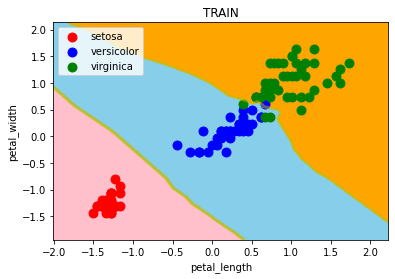

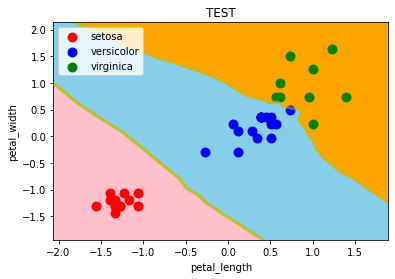

In [57]:
# 機械学習モデル
clf = KNeighborsClassifier()

# 結果リストの作成
result = []

# 特徴量と目的変数のセット
d1,d2 = 'petal_length','petal_width'
X = df[[d1,d2]].values
y = df['Species'].values
    
# 訓練用、検証用データの作成
X_train, X_test, y_train, y_test = \
train_test_split(X,y,test_size=0.25,random_state=0)
    
# 標準化
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# 訓練データで機械学習
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
    
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test, y_pred,average='micro')
    
tmp = [d1,d2,accuracy,precision,recall,f1]
result.append(tmp)

result = pd.DataFrame(result,
                      columns=['feature1','feature2',
                               'Accuracy','Precision','Recall','F1_measure'])
# 結果出力
print(result)
decision_region(X_train_std,y_train,clf,title='TRAIN',ylabel=d2,xlabel=d1)
decision_region(X_test_std,y_test,clf,title='TEST',ylabel=d2,xlabel=d1)

＜考察＞  
機械学習のモデル（今回はハイパーパラメータの調整はしない）と、  
特徴量の組み合わせで最適な結果を調査した。  
  
結果は、petal_lengthとpetal_widthの組み合わせで、  
最近傍法で行うと、検証データに対して100%の精度で予測できた。（上図）  

ただし、訓練データでは100%の分類はできておらず、  
検証データが偶然、指標が良くなる抽出だったことが図より確認できる。  

このことから、訓練データと、検証データを複数回ランダムに抽出し、  
モデルを評価する（交差検証？）が必要と考える。  
